# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement
- Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

- Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.


### Data Dictionary

Data Dictionary:

- order_id: Unique ID of the order
- customer_id: ID of the customer who ordered the food
- restaurant_name: Name of the restaurant
- cuisine_type: Cuisine ordered by the customer
- cost_of_the_order: Price paid per order
- day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- rating: Rating given by the customer out of 5
- food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
#importing required libraries for reading and data manupulation
import numpy as np
import pandas as pd

#importing libraries required for visulaization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [4]:
# Reading the data
df = pd.read_csv('foodhub_order.csv')

In [3]:
#Viewing the first 5 rows of the dataset
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
#get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- It can be observed that there are 1898 rows and 9 columns in the dataset.
- There are no missing values in the dataset as non of the columns have null values.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- Out of the 9 columns, 4 columns are of object datatype and 5 columns are of numerical(integer and float) datatype.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
#check if there are any null values in any of the columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- There are no missing values in the dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
#Analyze teh statistical measures of each column
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [12]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
- As per the above analysis, the minimum, average and maximum time it takes for food to be prepared once the order is placed is 20 minutes, 27 minutes 37 seconds and 35 minutes respectively.

### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
# To know how many orders are not rated, let us understand the different values in the ratings column.
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
- Out of 1898 orders, 736 orders are not rated i.e, around 38% orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
#Creating a list of all columns
col = list(df.columns)


In [11]:
#Exploring the unique values in each column and their frequency
for i in col:
    print(df[i].value_counts())
    print('-'*50)

1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64
--------------------------------------------------
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64
--------------------------------------------------
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian         

Observation:
- Order_id has 1898 unique values, so we do not analyze the order_id variable.

Visualizing Numerical Variables

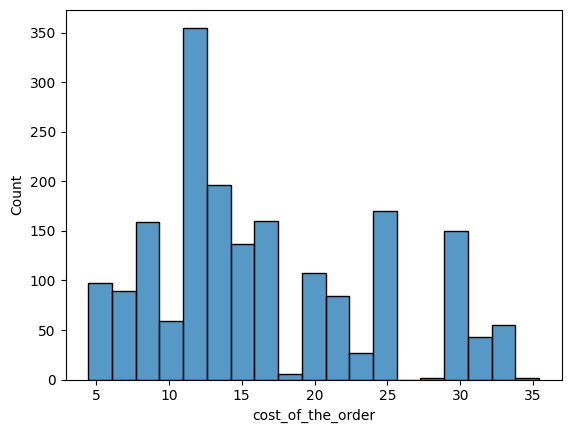

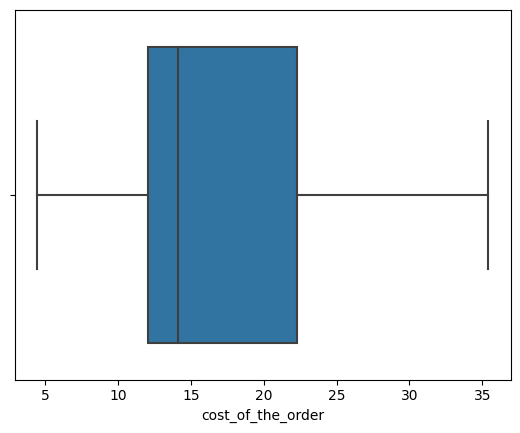

In [19]:
#As cost_of_the_order is a numerical variable, we will use histogram to visualize the distribution of it.
sns.histplot(data=df,x = 'cost_of_the_order',stat = 'count')
plt.show()
sns.boxplot(data = df, x = 'cost_of_the_order')
plt.show()

Observations:
- From the above visualizations, it is evident that the distribution is slightly right skewed.
- We can conclude that there are no outliers from the box plot above

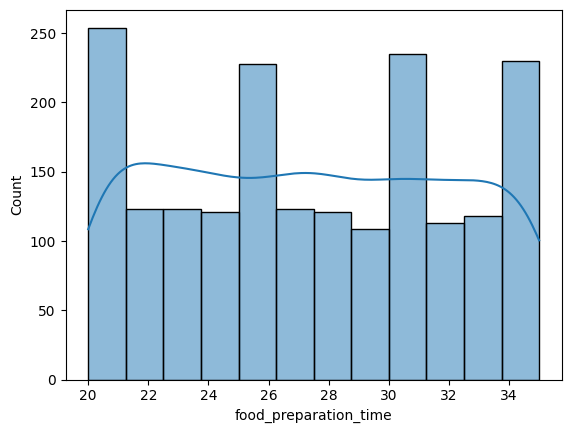

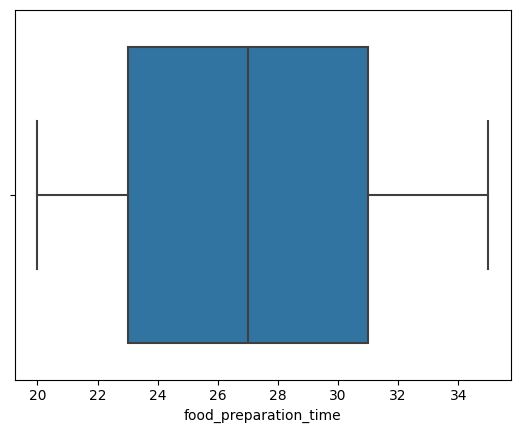

In [25]:
#As food_preparation_time is a numerical variable, we will use histogram and box plot to visualize the distribution of it.
sns.histplot(data=df,x = 'food_preparation_time',stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df, x = 'food_preparation_time')
plt.show()

Observations:
   - It can be observed that the distribution is not skewed. 
   - It is neither a normal distribution. Even though the median and mean are almost equal, the interquartile range is greater than 1.33 times the standard deviation(as seen in the statistical summary using df.describe() in the above cells). And the distribution is also not bell shaped. 
   - The values do not cluster around a central value like mean or median, rather they are split around the entire range of values between 20 and 35 minutes.

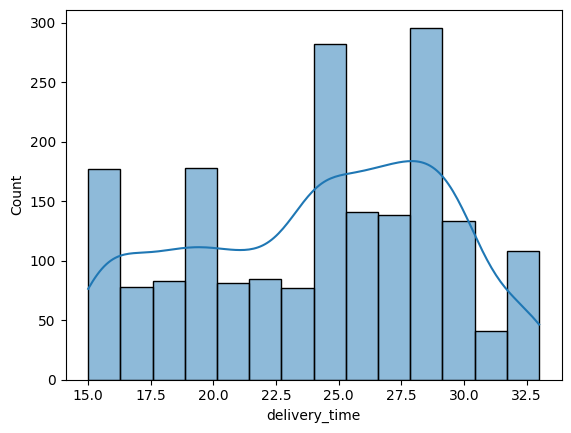

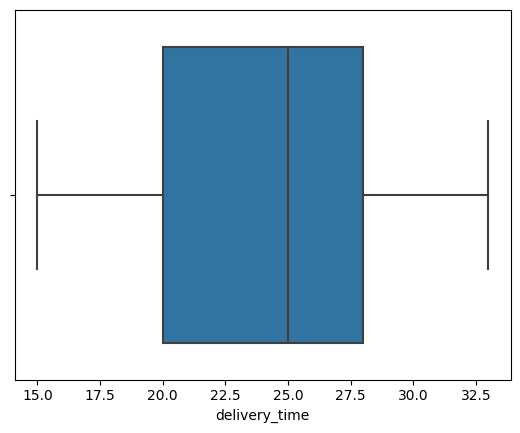

In [26]:
sns.histplot(data=df,x = 'delivery_time',stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df, x = 'delivery_time')
plt.show()

Observations:
- It can be observed that the distribution is left skewed. 
- There are no outliers 
- Majority the of orders cluster between 24 to 29 minutes.
    

In [28]:
#checking the different delivery times of orders and to understand what is the most frequent delivery time range.
df['delivery_time'].value_counts()

24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: delivery_time, dtype: int64

Visualizing Categorical Variables

In [35]:
# Visualize the restaurant names column to understand or observe how many different restaurants people are ordering from and which restaurants get the most orders.
df['restaurant_name'].value_counts()


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

Observation:
- There are 178 unique restaurants in the dataset so it is not possible to visually analyze this variable.
- We can visualize the top 5 restaurants which recieved most orders.

In [37]:
top_restaurants = df['restaurant_name'].value_counts().head()

In [39]:
top_restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

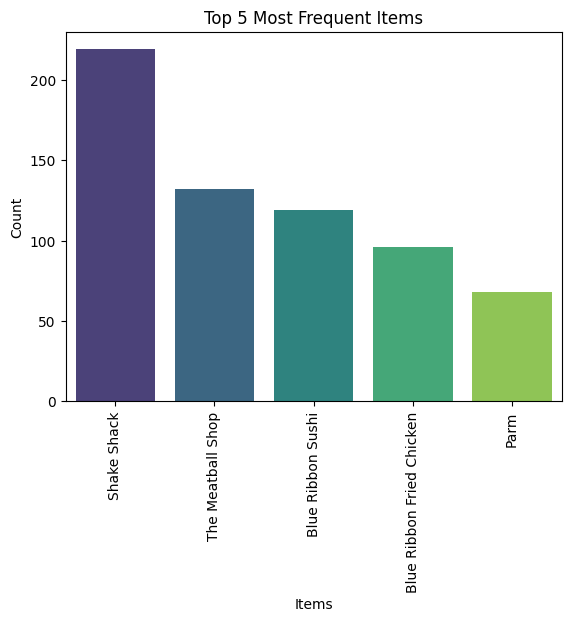

In [41]:
sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette='viridis')
plt.title('Top 5 Most Frequent Items')
plt.xlabel('Items')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

Observations:
- Shake Shack restaurant recieved significantly more orders as compared to remaining 4 restaurants from the top 5 restaurants.


In [44]:
#Visualize and analyze the 'cuisine_type' variable.
df['cuisine_type'].nunique()

14

Observation:
- Visulaizing 14 unique categories is manageable.

In [46]:
cuisines = df['cuisine_type'].value_counts()

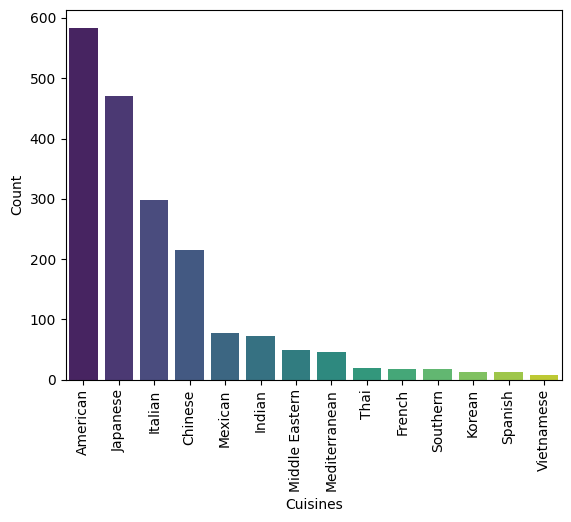

In [47]:
sns.barplot(x=cuisines.index, y=cuisines.values, palette='viridis')

plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate item names for better readability if needed
plt.show()

Observation:
- It can be observed that American and Japanese are the most ordered cuisines, followed by Italian and Chinese.
- Korean, Spanish and Vietnamese are the least ordered cuisines

In [48]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

<Axes: xlabel='day_of_the_week', ylabel='count'>

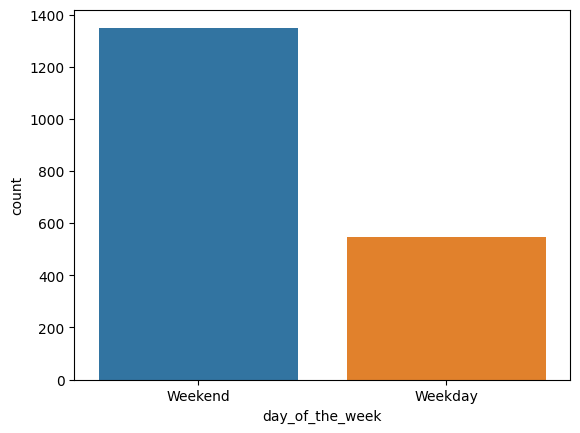

In [49]:
sns.countplot(data = df, x = 'day_of_the_week')

Observations:
- It is evident from the above graph that majority of the orders are placed on weekend. 

In [51]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

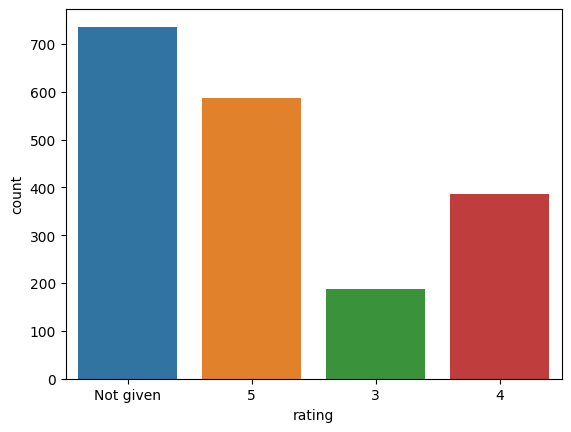

In [52]:
sns.countplot(data = df, x = 'rating')

In [167]:
#calculating percent of order not rated
not_rated = df[df['rating']== 'Not given']
(not_rated.shape[0]/1898)*100

38.77766069546891

Observations:
- It is evident that aroung 38% of the orders were not rated.
- out of the rated orders, most orders were given a rating of 5.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [53]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
- The above 5 restaurants are the top 5 restaurants in terms of number of orders received.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [57]:
#First I will try to get to a dataframe for weekends
Weekend_data = df[df['day_of_the_week']== 'Weekend']

In [59]:
Weekend_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22


In [62]:
Weekend_data['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
- As per the above analysis, American cuisine is the most popular cusine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [67]:
#Find total orders
total = df['cost_of_the_order'].shape[0]

In [68]:
#Find count of orders above 20 dollars
above_20 = df[df['cost_of_the_order']> 20].shape[0]

In [69]:
#Percent of orders that cost more than 20 dollars
Result = (above_20/total)*100
Result

29.24130663856691

#### Observations:
- 29.24% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [70]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- Mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [72]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
- The top 3 most frequest customers and the number of orders they placed are:
  - Customer ID: 52832 Orders: 13
  - Customer ID: 47440 Orders: 10
  - Customer ID: 83287 Orders: 9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Note:
- Order ID and Customer ID columns can be ignored in multivariate analysis as they do not contribute in understanding relationship with any other variable. 

In [85]:
#dropping order id and customer id columns
new_df = df.drop(columns = ['order_id','customer_id'], axis = 1)

In [86]:
new_df.head()

,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [87]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        1898 non-null   object 
 1   cuisine_type           1898 non-null   object 
 2   cost_of_the_order      1898 non-null   float64
 3   day_of_the_week        1898 non-null   object 
 4   rating                 1898 non-null   object 
 5   food_preparation_time  1898 non-null   int64  
 6   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 103.9+ KB


Observations:
   - Now, there are 4 categorical and 3 numerical variables in the dataset.

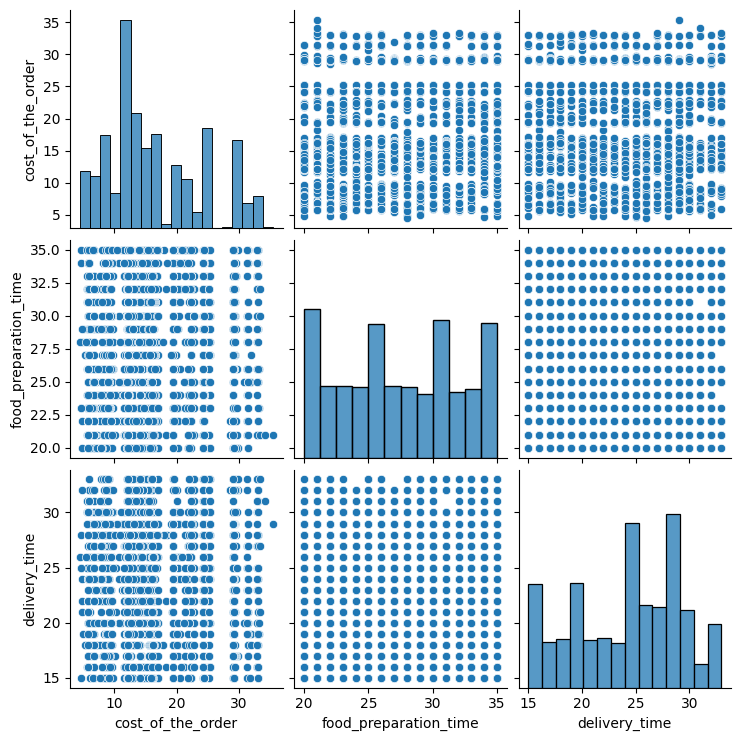

In [89]:
#analyzing the relationship between varibales in pairs to see how the data points are spread out
sns.pairplot(new_df)
plt.show()

Observations:
- From the above pair plot it can be observed that there are no patterns or correlation between the cost of the order, food preparation time and delivery time. The proportion of variance in any of the above variables cannot be explained by other variables.

C:\Users\pramo\AppData\Local\Temp\ipykernel_50856\595210777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = new_df.corr(), annot = True,cmap = 'coolwarm', vmin = -1, vmax = 1)


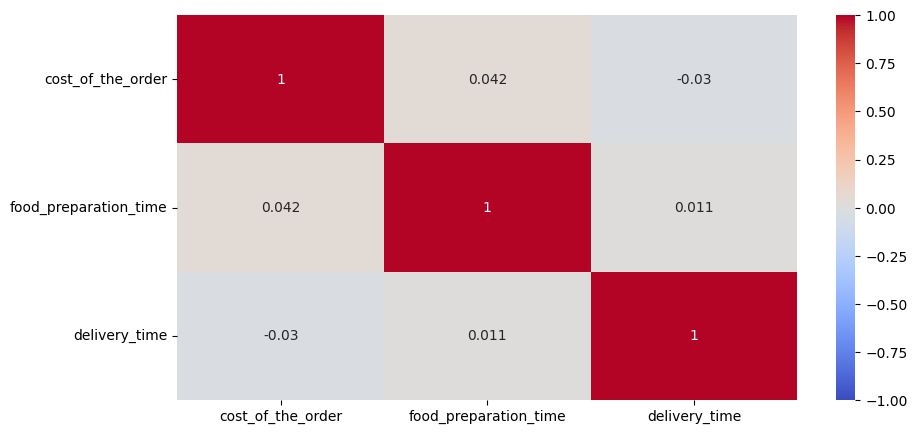

In [90]:
#Analyzing the correlation between numerical columns heat map
plt.figure(figsize = (10,5))
sns.heatmap(data = new_df.corr(), annot = True,cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.show()

Observations:
- No Correlations are observed in the above heatmap.

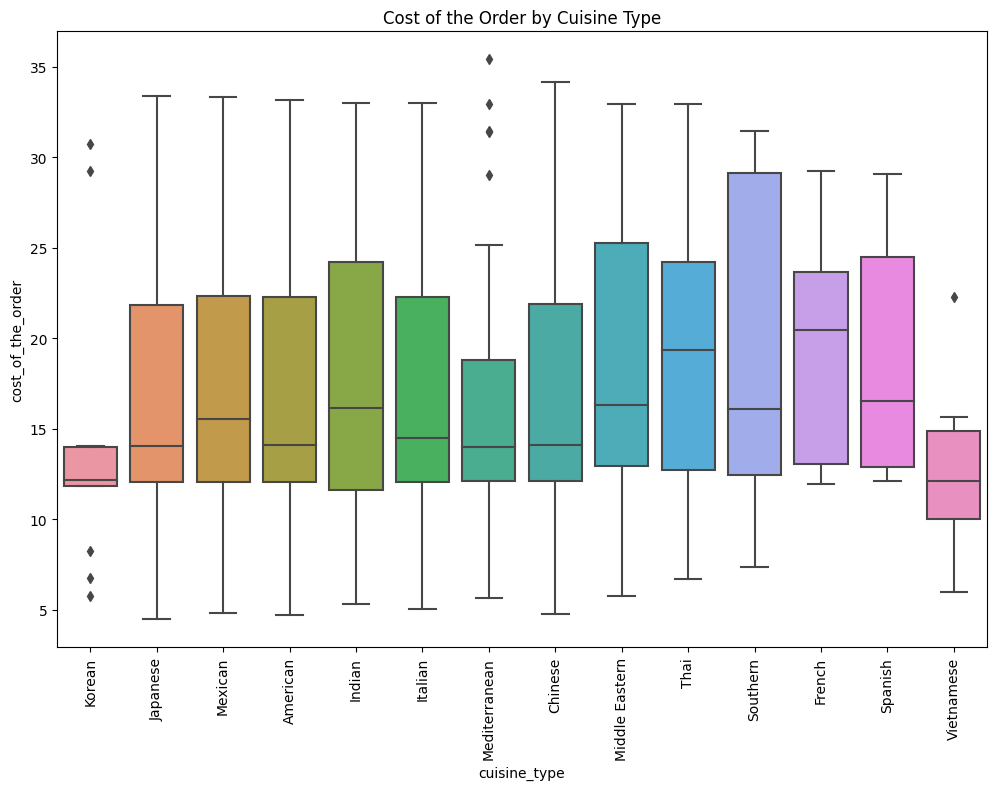

In [99]:
#Analyzing cost of the order by cuisine type 
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)
plt.title('Cost of the Order by Cuisine Type')
plt.show()


Observations:
- Though the most expensive dish is from southern cuisine, the median cost of French cuisine is higher than all other cuisines.
- The median cost of Vietnamese cuisine is the cheapest among all other cuisines.
- The range of cost for southern cuisine type is broader. This means it has more variability in order costs.
- There are certain outliers in the costs of orders from Korean, Mediterranean and Vietnamese cuisines. This suggests that, ocassionally, the cost of few dishes might go low or up. 

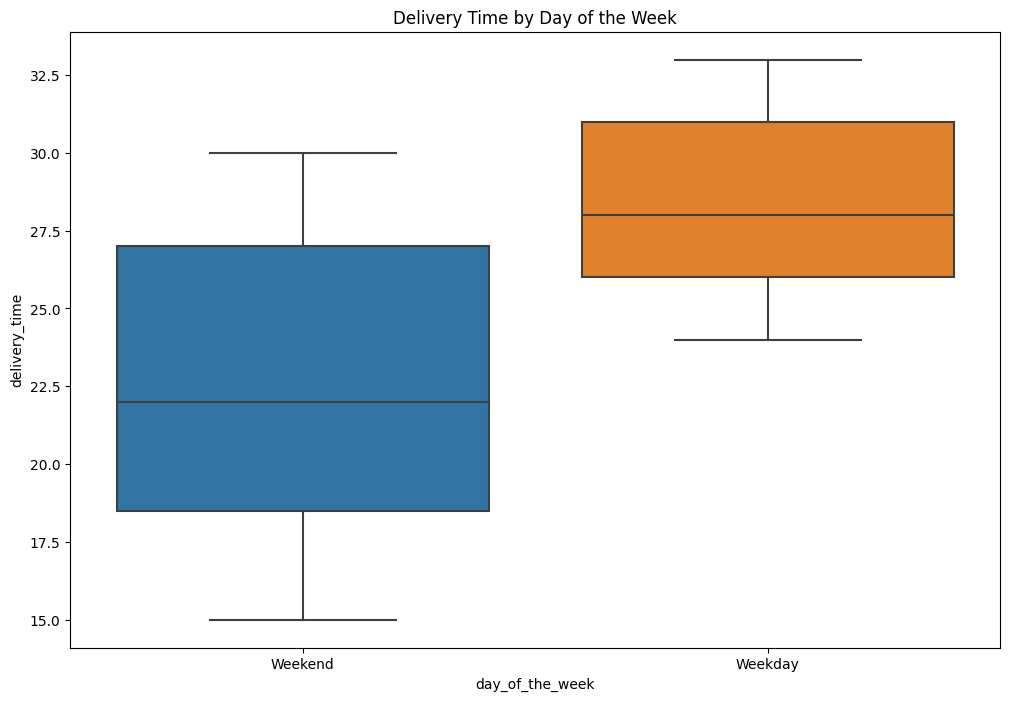

In [100]:
#Analyzing delivery time by the day of the week.
plt.figure(figsize=(12, 8))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.show()

Observations:
- It is evident that the orders are delivered quicker on weekends compared to weekdays.
- The median delivery time in a weekday is higher than the weekend. 
- The fastest delivery time on weekday is also slower than the median delivery time of the weekend. This means by the time an order gets delivered on weekday, more than 50% of the orders gets delivered on weekend. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [102]:
#Since we have to deal with only the rated orders, we have to remove the non-rate records for this question.

rated_df = df[df['rating'] != 'Not given']

In [103]:
rated_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [127]:
#As 'rating' is of object type we need to convert it into numeric type to calculate the average rating.
rated_df['rating'] = rated_df['rating'].apply(int)

C:\Users\pramo\AppData\Local\Temp\ipykernel_50856\1784428469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_df['rating'] = rated_df['rating'].apply(int)


In [128]:
#Group by 'restaurant_name' to calculate the count of ratings and average rating
restaurant_group = rated_df.groupby('restaurant_name').agg(
    rating_count=('rating', 'size'),  # Count of ratings
    avg_rating=('rating', 'mean')     # Average rating
).reset_index()

#Filter the restaurants based on the given conditions
eligible_restaurants = restaurant_group[
    (restaurant_group['rating_count'] > 50) & (restaurant_group['avg_rating'] > 4)
]


In [129]:
eligible_restaurants

,restaurant_name,rating_count,avg_rating
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


#### Observations:
- In total, there are 4 restaurants which are fulfilling the criteria to get promotional offer.
  - Shake Shack
  - The Meatball Shop
  - Blue Ribbon Sushi
  - Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [141]:
#calculating revenue for each order
def net_revenue(x):
    if x>5 and x<=20:
        revenue = x*0.15
        return revenue
    elif x>20:
        revenue = x*0.25
        return revenue
    else:
        return 0

In [142]:
# Create a new column for revenue
df['revenue'] = df['cost_of_the_order'].apply(net_revenue)

In [143]:
#calculating net revenue
net_revenue = df['revenue'].sum()

In [145]:
net_revenue

6166.303

#### Observations:
- The net revenue generated by company across all orders is 6166.303 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [146]:
# creating a new column for time taken to get delivered from the time the order is placed
df['total_time'] = df['delivery_time']+df['food_preparation_time']

In [157]:
#calculating the total number of orders
total_orders = df['total_time'].size

In [148]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [155]:
#calculating the number of orders which take more than 60 minutes to get prepared and delivered.
long_orders = df[df['total_time']>60]['total_time'].size

In [158]:
#calculating the percent of orders which take more than 60 minutes to get delivered from the time the order is placed.
percent_long_orders = (long_orders/total_orders)*100

In [159]:
percent_long_orders

10.537407797681771

#### Observations:
- From the above calculations, around 10.53% of the orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [160]:
#calculating mean delivery time for weekends
df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

22.4700222057735

In [161]:
#calculating mean delivery time for weekdays
df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

28.340036563071298

#### Observations:
- Mean delivery time during weekends is 22.47 minutes.
- Mean delivery time during weekdays is 28.34 minutes.
- The mean delivery time during weekends is around 6 minutes less than weekdays. This means on an average an order can get delivered 6 minutes earlier on weekends as compared weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [175]:
#analyzing which cuisine type generates more revenue
df.groupby('cuisine_type').sum().sort_values(by = 'revenue', ascending = False)

C:\Users\pramo\AppData\Local\Temp\ipykernel_50856\1246169677.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cuisine_type').sum().sort_values(by = 'revenue', ascending = False)


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,revenue,total_time
cuisine_type,,,,,,,
American,862853485,107555095,9530.78,16025,14129,1878.2740,30154
Japanese,694417840,75902159,7663.13,12930,11342,1478.2445,24272
Italian,440303276,47551355,4892.77,8190,7321,966.8845,15511
Chinese,317668929,38803384,3505.62,5915,5129,690.0405,11044
Mexican,113763379,13971923,1303.85,2058,1878,256.6930,3936
Indian,107857010,11833767,1235.14,1979,1758,246.9940,3737
Middle Eastern,72393190,8273157,922.21,1307,1180,193.5535,2487
Mediterranean,67964240,5331774,711.84,1242,1085,136.3280,2327
Thai,28074933,3853678,364.95,519,440,78.0525,959


### Conclusions:
*  Revenue Distribution:

   * A significant portion of revenue is derived from orders costing more than 20 dollars, where the company charges a 25%        commission.This indicates that higher-value orders contribute substantially to the company’s earnings.
   * Orders costing between 5 and 20 dollars also contribute to revenue, but at a lower commission rate (15%).
- Cuisine Type:

    - French cuisine type has higher median order value among all others.
    - American and Japanese cuisines are the most ordered cuisine types which indicates more sales and revenue are be generated from these cuisines.
    - Few outliers are observed in korean, Mediterranean and Vietnamese cusine which indicates there might be some seasonal dishes, or prices of few dishes might vary.
    - Southern cuisine type has a larger IQR. 
    
- Ratings
  - Aroung 38% of the orders are not rated.
  - 4 restaurants have a rating count of more than 50 with an average rating of more than 4.

### Recommendations:

* French and thai cuisine orders have a higher median and average order value. Promoting or increasing the sales of these cuisines will definitely help in generating more revenue.
* Around 38% of the orders are not rated.Need to put more emphasize on customer feedback. Making sure that the customers rate the order will help in better analysis and accurate insights.
* High-rated restaurants should be given more visibility on the platform, as they are likely to attract more customers and generate higher revenue.
* If the delivery time on weekdays can be improved, then the restaurants can get more orders during weekdays as well.
* Cross-sell high rated cuisine items to increase sales.
* Introduce customer loyalty programs that reward repeat orders, particularly for higher-value cuisines or high-rated restaurants. This can help in retaining customers and increasing order frequency.
* Prepare startegies to improve low rated cuisines and less frequently ordered restaurants.